<a href="https://colab.research.google.com/github/Vputri/Rekayasa-Komputasi/blob/main/Rekayasan_Perangkat_Lunak_Tugas_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Using Least Squares

In [ ]:
import pandas as pd
data = pd.read_csv('/content/headbrain.csv')
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

In [ ]:
def mean(values):
	return sum(values) / float(len(values))
 
mean_x = mean(X)
mean_y = mean(Y)
n = len(X)

For each (x,y) point calculate x2 and xy

In [ ]:
num = 0
den = 0
for i in range(n):
  num += (X[i] - mean_x) * (Y[i] - mean_y)
  den += (X[i] - mean_x) ** 2

Calculate Slope m:

In [ ]:
m = num / den
print("nilai m : ", m)

nilai m :  0.26342933948939945


Calculate Intercept b:

In [ ]:
c = mean_y - (m * mean_x)
print("nilai c : ", c)

nilai c :  325.57342104944223


Assemble the equation of a line

In [ ]:
Y_pred = m * X + c

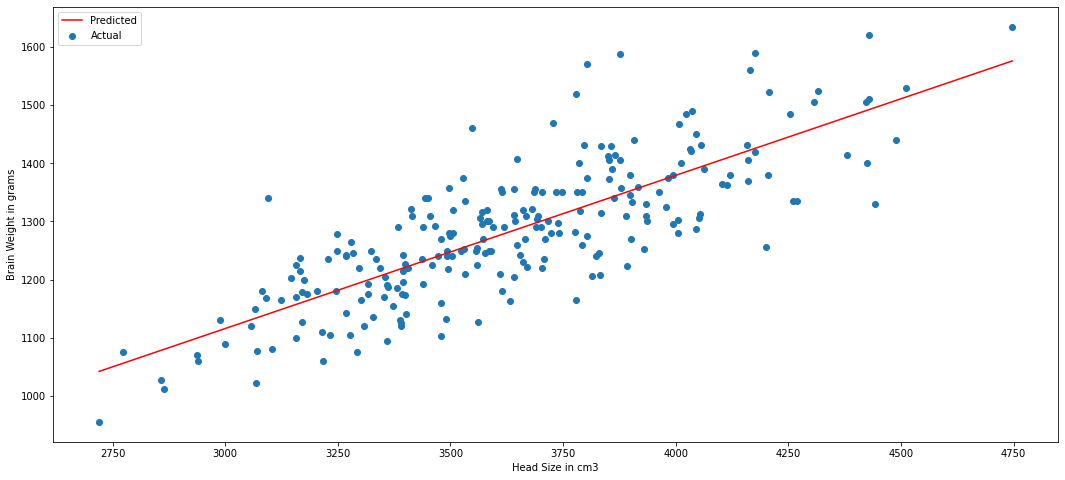

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
plt.scatter(X, Y, label='Actual')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red', label='Predicted')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [ ]:
import numpy as np
rmse = 0
for i in range(n):
    predictions = list()
    y_pred = c + m * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE : ", rmse)

RMSE :  72.1206213783709


# Nonlinier Regression (Polynomial Regression)

In [ ]:
np.random.seed(42)
X = np.random.rand(1000,1)
y = 5*((X)**(2)) + np.random.rand(1000,1)

In [ ]:
def loss(y, y_hat):
    loss = np.mean((y_hat - y)**2)
    return loss

In [ ]:
def gradients(X, y, y_hat):
    m = X.shape[0]
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    db = (1/m)*np.sum((y_hat - y)) 
    return dw, db

In [ ]:
def x_transform(X, degrees):
    t = X.copy()
    for i in degrees:
        X = np.append(X, t**i, axis=1)
            
    return X

In [ ]:
def train(X, y, bs, degrees, epochs, lr):
    x = x_transform(X, degrees)
    m, n = x.shape
    w = np.zeros((n,1))
    b = 0
    y = y.reshape(m,1)
    losses = []
    
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            start_i = i*bs
            end_i = start_i + bs
            xb = x[start_i:end_i]
            yb = y[start_i:end_i]
            y_hat = np.dot(xb, w) + b
            dw, db = gradients(xb, yb, y_hat)
            w -= lr*dw
            b -= lr*db

        l = loss(y, np.dot(x, w) + b)
        losses.append(l)
        
    return w, b, losses

In [ ]:
def predict(X, w, b, degrees):
    x1 = x_transform(X, degrees)
    return np.dot(x1, w) + b

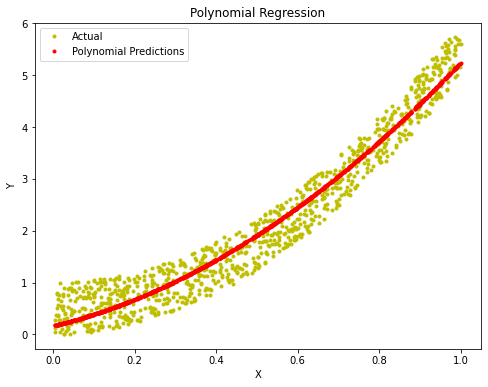

In [ ]:
w, b, l = train(X, y, bs=100, degrees=[2], epochs=1000,
                lr=0.01)# Plotting
fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'y.')
plt.plot(X, predict(X, w, b, [2]), 'r.')
plt.legend(["Actual", "Polynomial Predictions"])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.show()

In [ ]:
def r2_score(y, y_hat):
    return 1 - (np.sum((np.array(y_hat)-np.array(y))**2)/
                np.sum((np.array(y)-np.mean(np.array(y)))**2))
r2_score(y, predict(X, w, b, [2]))

0.9551785719360419